#  <I><center>AI IMAGE DETECTION USING CONVOLUTIONAL NEURAL NETWORK


 ## ABSTRACT

 This project focuses on training convolutional neural networks (CNNs) for image classification tasks, specifically for distinguishing between real and AI-generated images. Two models were developed: a base CNN model and a transfer learning model based on DenseNet. The models were trained using image datasets and evaluated based on their accuracy and loss. The transfer learning model showed superior performance compared to the base CNN model.

In [1]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Data Loading And Augmentation

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
train_set=train_datagen.flow_from_directory('image dataset/train',
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='binary')

Found 8000 images belonging to 2 classes.


(1, 100, 100, 3)


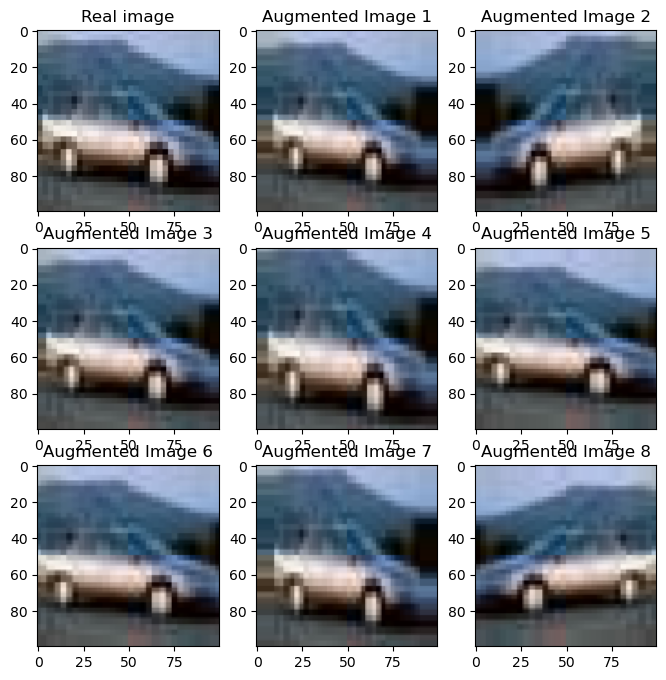

In [3]:
test_image=np.random.rand(150,150,3)
img_path="image dataset/train/REAL/0000 (2).jpg"

img=image.load_img(img_path,target_size=(100,100))
plt.figure(figsize=(8,8))
plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Real image")

img=image.img_to_array(img)
img=img.reshape((1,)+img.shape)
print(img.shape)

i=2
for batch in train_datagen.flow(img,batch_size=1):
    plt.subplot(3,3,i)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title('Augmented Image {}'.format(i-1))
    i+=1
    if i >9:
        break
plt.show()

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(directory="image dataset/test",
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode='binary')


Found 2000 images belonging to 2 classes.


### Model Definition (CNN)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam

Image_width=150
Image_height=150
Image_size=(Image_width,Image_height)
Image_channels=3
batch_size=32
EPOCHS=100

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_width,Image_height,Image_channels),name='Conv1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),name='pool1'))

model.add(Conv2D(64,(3,3),activation='relu',name='Conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),name='pool2'))

model.add(Conv2D(64,(3,3),activation='relu',name='Conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),name='pool3'))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())


model.add(Dense(1,activation='sigmoid'))
optimizer=Adam(0.001)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 pool1 (MaxPooling2D)        (None, 74, 74, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                                 
 pool2 (MaxPooling2D)        (None, 36, 36, 64)      

### Model Training

In [6]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
checkpoint=ModelCheckpoint('AI detection model1.keras',monitor='val_loss', save_best_only=True, mode='min', verbose=2)

early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)
                           


In [7]:
%%time

hist=model.fit(
              train_set,
              epochs=EPOCHS,
              validation_data=test_set,
              callbacks=[checkpoint,early_stopping]
)


Epoch 1/100


250/250 [==============================] - ETA: 0s - loss: 0.4946 - accuracy: 0.7820
Epoch 1: val_loss improved from inf to 0.78721, saving model to AI detection model1.keras
250/250 [==============================] - 282s 1s/step - loss: 0.4946 - accuracy: 0.7820 - val_loss: 0.7872 - val_accuracy: 0.5730
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8499
Epoch 2: val_loss improved from 0.78721 to 0.60711, saving model to AI detection model1.keras
250/250 [==============================] - 261s 1s/step - loss: 0.3555 - accuracy: 0.8499 - val_loss: 0.6071 - val_accuracy: 0.7425
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.2978 - accuracy: 0.8744
Epoch 3: val_loss improved from 0.60711 to 0.32013, saving model to AI detection model1.keras
250/250 [==============================] - 246s 985ms/step - loss: 0.2978 - accuracy: 0.8744 - val_loss: 0.3201 - val_accuracy: 0.8710
Epoch 4/100
250/250 [=========

### Model Evaluation 

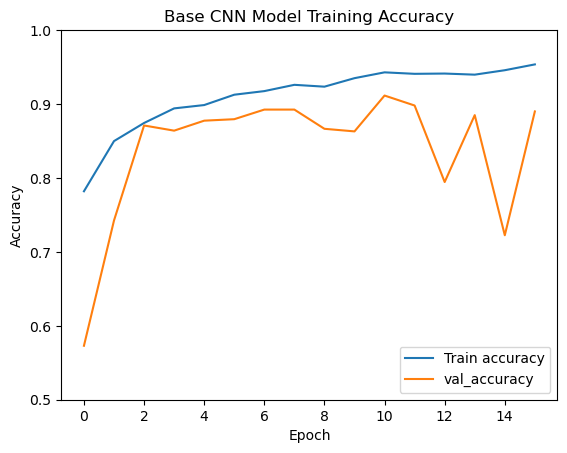

In [8]:
plt.plot(hist.history['accuracy'], label='Train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.title ("Base CNN Model Training Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

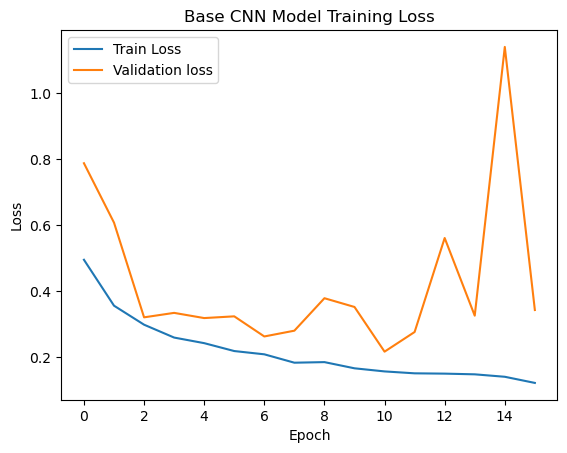

In [9]:
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title('Base CNN Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
model.save('AI detection model1.keras')

### Transfer Learning (Densenet)

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121

base_model_densenet = tf.keras.applications.DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150, 3)  # Input image shape
)


In [8]:
for layer in base_model_densenet.layers:
    layer.trainable = False


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint=ModelCheckpoint('AI image transfer model Densenet.keras',monitor='val_loss', save_best_only=True, mode='min', verbose=2)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)

In [11]:
history = model.fit(train_set,
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[checkpoint,early_stopping]
                   )


Epoch 1/100



250/250 [==============================] - ETA: 0s - loss: 0.5199 - accuracy: 0.7418
Epoch 1: val_loss improved from inf to 0.41817, saving model to AI image transfer model Densenet.keras
250/250 [==============================] - 222s 878ms/step - loss: 0.5199 - accuracy: 0.7418 - val_loss: 0.4182 - val_accuracy: 0.8065
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.8060
Epoch 2: val_loss improved from 0.41817 to 0.41512, saving model to AI image transfer model Densenet.keras
250/250 [==============================] - 150s 598ms/step - loss: 0.4261 - accuracy: 0.8060 - val_loss: 0.4151 - val_accuracy: 0.8110
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.3860 - accuracy: 0.8298
Epoch 3: val_loss improved from 0.41512 to 0.36514, saving model to AI image transfer model Densenet.keras
250/250 [==============================] - 151s 604ms/step - loss: 0.3860 - accuracy: 0.8298 - val_loss: 0.3651 - val_accuracy: 0.8465

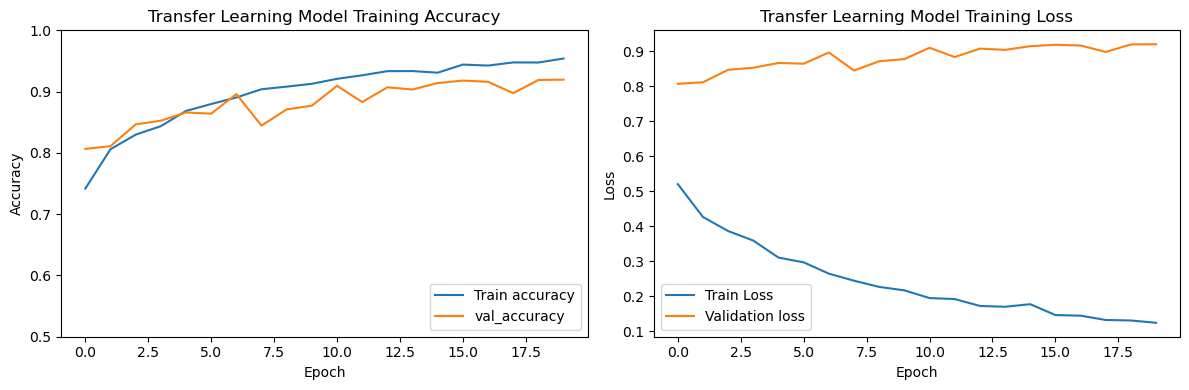

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Transfer Learning Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation loss')
plt.title('Transfer Learning Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Model Saving And Loading

In [ ]:
base_model_densenet.save('AI image transfer model Densenet.keras')

In [13]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model



In [18]:
loading_model=load_model('AI detection model1.keras')
loading_model=load_model('AI image transfer model Densenet.keras')

### Prediction

In [19]:
def predict_image_cnn(image_path):
    img=image.load_img(image_path,target_size=(Image_width,Image_height))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0) / 255.0
    prediction = loading_model.predict(img_array)
    if prediction[0][0].all() >0.5:
        return 'REAL'
    else:
        return 'AI IMAGE'
    

In [20]:
def predict_image_densenet(image_path):
    img=image.load_img(image_path,target_size=(Image_width,Image_height))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0) / 255.0
    prediction = loading_model.predict(img_array)
    if prediction[0][0].all() >0.5:
        return 'REAL'
    else:
        return 'AI IMAGE'
    
    


In [21]:
test_image="image dataset/Prediction/rabit.jpeg"
prediction_cnn=predict_image_cnn(test_image)
print(prediction_cnn)

test_image="image dataset/Prediction/rabit.jpeg"
prediction_densenet=predict_image_densenet(test_image)
print(prediction_densenet)

1/1 [==============================] - 0s 88ms/step
REAL
1/1 [==============================] - 0s 34ms/step
REAL


## CONCLUSION 

 In conclusion, the transfer learning model based on DenseNet outperformed the base CNN model, achieving higher accuracy in classifying images as real or AI-generated. The use of transfer learning proved to be effective in improving model performance, demonstrating the importance of leveraging pre-trained models for image classification tasks. Future work could involve further fine-tuning the transfer learning model or exploring other pre-trained models for even better performance.